In [1]:
!gdown 11iTI9YpShmEkMHMzj4sERn8Fs4Cpty7N
!gdown 1HopsiHutaeTB4Om81uvj_ejtQV5miuxi
!unzip dataset.zip
!pip install hazm

Downloading...
From (original): https://drive.google.com/uc?id=11iTI9YpShmEkMHMzj4sERn8Fs4Cpty7N
From (redirected): https://drive.google.com/uc?id=11iTI9YpShmEkMHMzj4sERn8Fs4Cpty7N&confirm=t&uuid=48c573a0-21a7-4360-a191-ae0413ef477e
To: /content/Medical_Corpus.jsonl
100% 757M/757M [00:08<00:00, 93.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1HopsiHutaeTB4Om81uvj_ejtQV5miuxi
To: /content/dataset.zip
100% 8.87M/8.87M [00:00<00:00, 129MB/s]
Archive:  dataset.zip
replace dev.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from hazm import word_tokenize

In [3]:
def read_jsonl_file(jsonl_file):
    valid_records = []
    with open(jsonl_file, 'r', encoding='utf-8') as file:
        for line in file:
            line = line.strip()
            json_object = json.loads(line)
            valid_records.append(json_object)
    df = pd.DataFrame(valid_records)
    return df

In [4]:
df = read_jsonl_file("./Medical_Corpus.jsonl")

In [5]:
sources = ['https://niniban.com', 'https://www.hidoctor.ir', 'https://extern.ir', 'https://seebmagazine.com', 'https://www.paziresh24.com', 'https://salammag.com', 'https://doctoreto.com', 'https://www.darmankade.com', 'https://majalepezeshki.ir', 'https://nabz.site', 'https://hamrah-teb.com']
accumulators = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for index,row in df.iterrows():
    source = row['source']
    if source == 'https://niniban.com':
       accumulators[0] += 1
    elif source == 'https://www.hidoctor.ir':
       accumulators[1] += 1
    elif source == 'https://extern.ir':
       accumulators[2] += 1
    elif source == 'https://seebmagazine.com':
       accumulators[3] += 1
    elif source == 'https://www.paziresh24.com':
       accumulators[4] += 1
    elif source == 'https://salammag.com':
       accumulators[5] += 1
    elif source == 'https://doctoreto.com':
       accumulators[6] += 1
    elif source == 'https://www.darmankade.com':
       accumulators[7] += 1
    elif source == 'https://majalepezeshki.ir':
       accumulators[8] += 1
    elif source == 'https://nabz.site':
       accumulators[9] += 1
    elif source == 'https://hamrah-teb.com':
       accumulators[10] += 1


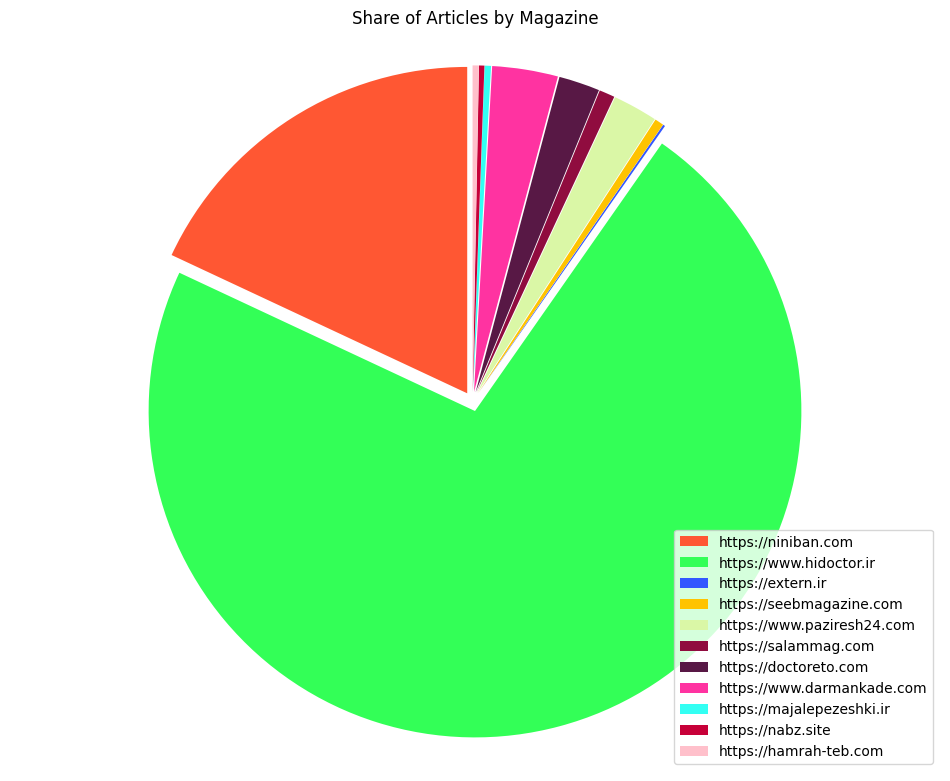

In [6]:
colors = [
    '#FF5733',  # Coral Red
    '#33FF57',  # Lime Green
    '#3357FF',  # Bright Blue
    '#FFC300',  # Gold
    '#DAF7A6',  # Light Green
    '#900C3F',  # Dark Pink
    '#581845',  # Dark Purple
    '#FF33A1',  # Hot Pink
    '#33FFF3',  # Turquoise
    '#C70039',  # Crimson
    '#FFC0CB',  # Light Pink
    '#FFB300'   # Amber
]
explode = (0.03,) * len(accumulators)
plt.figure(figsize=(10*1.2, 8*1.2))
plt.pie(accumulators, autopct=None, startangle=90, explode=explode,colors =colors)
plt.legend(sources, loc="best")
plt.title('Share of Articles by Magazine')
plt.axis('equal')
plt.show()

In [7]:
def count_tokens_in_jsonl(jsonl_file):
    total_tokens = 0
    with open(jsonl_file, 'r', encoding='utf-8') as file:
        for line in file:
            json_object = json.loads(line)
            content = json_object.get("content", "")
            tokens = word_tokenize(content)
            total_tokens += len(tokens)

    return total_tokens
jsonl_file = 'Medical_Corpus.jsonl'
total_tokens = count_tokens_in_jsonl(jsonl_file)
print(f"Total number of tokens in contents: {total_tokens}")

Total number of tokens in contents: 89169584


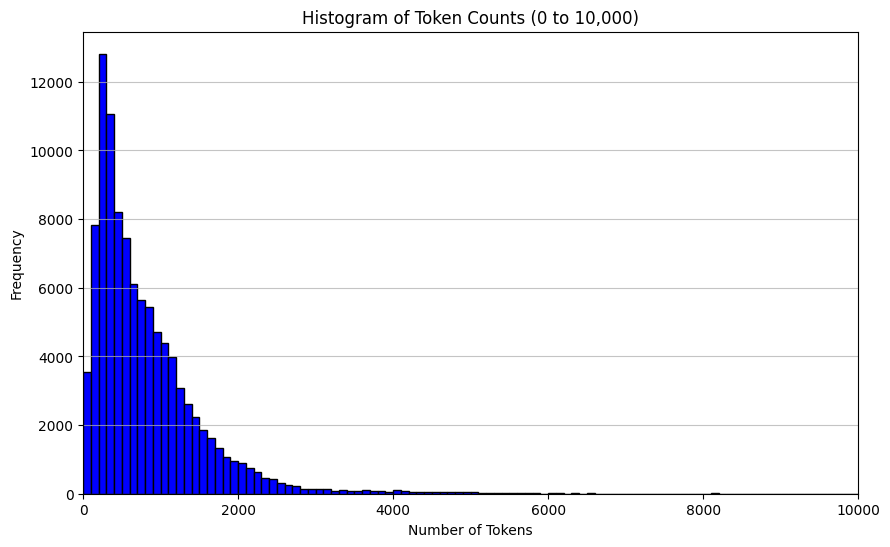

In [13]:
def count_tokens_in_jsonl(jsonl_file):
    token_counts = []
    with open(jsonl_file, 'r', encoding='utf-8') as file:
        for line in file:
            json_object = json.loads(line)
            content = json_object.get("content", "")
            tokens = content.split()
            token_counts.append(len(tokens))
    return token_counts

def plot_histogram(token_counts):
    plt.figure(figsize=(10, 6))
    plt.hist(token_counts, bins=100, color='blue', edgecolor='black', range=(0, 10000))
    plt.title('Histogram of Token Counts (0 to 10,000)')
    plt.xlabel('Number of Tokens')
    plt.ylabel('Frequency')
    plt.xlim(0, 10000)
    plt.grid(axis='y', alpha=0.75)
    plt.show()

jsonl_file = 'Medical_Corpus.jsonl'
token_counts = count_tokens_in_jsonl(jsonl_file)
total_tokens = sum(token_counts)
plot_histogram(token_counts)

MF3QA

In [18]:
def count_tokens_in_mf3qa(excel_file):
    total_tokens = 0
    df = pd.read_excel(excel_file)
    for index,row in df.iterrows():
            question = row['Question']
            answer = row['Answer']
            question_tokens = word_tokenize(question)
            answer_tokens = word_tokenize(answer)
            total_tokens += len(question_tokens) + len(answer_tokens)
    return total_tokens

total_train_tokens = count_tokens_in_mf3qa('./train.xlsx')
total_dev_tokens = count_tokens_in_mf3qa('./dev.xlsx')
total_test_tokens = count_tokens_in_mf3qa('./test.xlsx')
print(f"Total number of tokens in MF3QA train: {total_train_tokens}")
print(f"Total number of tokens in MF3QA dev: {total_dev_tokens}")
print(f"Total number of tokens in MF3QA test: {total_test_tokens}")

Total number of tokens in MF3QA train: 2776031
Total number of tokens in MF3QA dev: 320422
Total number of tokens in MF3QA test: 194670


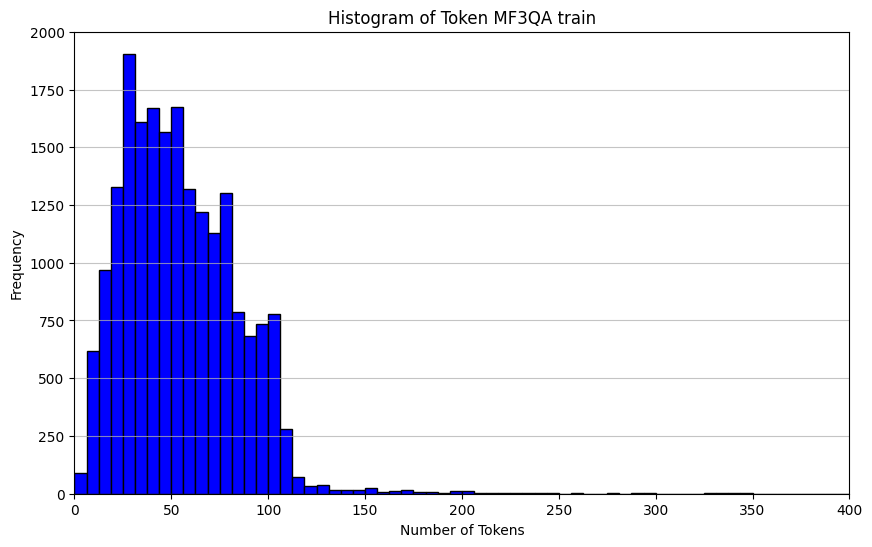

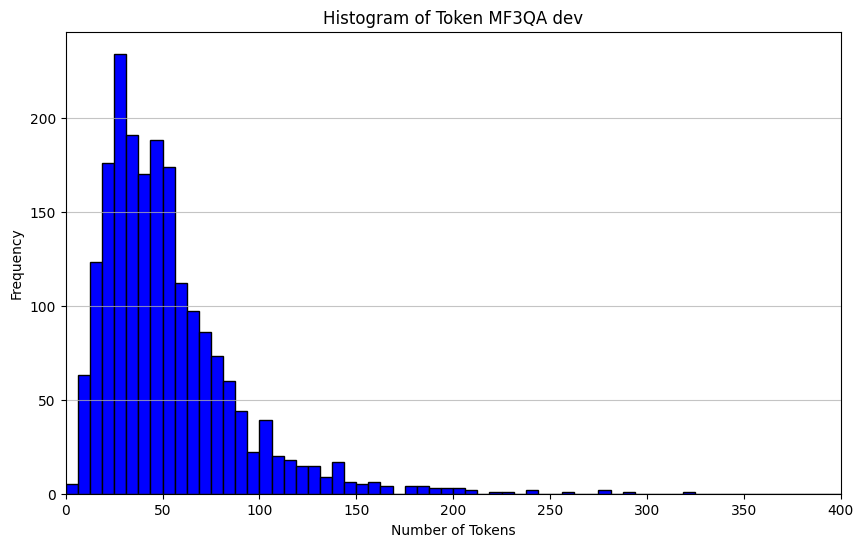

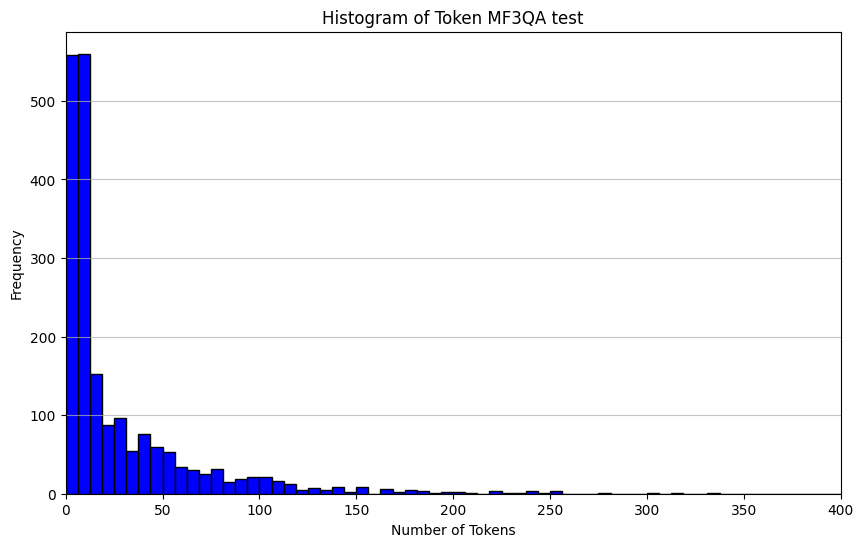

In [30]:
def count_tokens_in_mf3qa(excel_file):
    token_counts = []
    df = pd.read_excel(excel_file)
    for index,row in df.iterrows():
            content = row['Question']
            tokens = content.split()
            token_counts.append(len(tokens))
    return token_counts

def plot_histogram(token_counts,split):
    plt.figure(figsize=(10, 6))
    plt.hist(token_counts, bins=1600, color='blue', edgecolor='black', range=(0, 10000))
    plt.title('Histogram of Token MF3QA ' + split)
    plt.xlabel('Number of Tokens')
    plt.ylabel('Frequency')
    plt.xlim(0, 400)
    plt.grid(axis='y', alpha=0.75)
    plt.show()

train_token_counts = count_tokens_in_mf3qa('./train.xlsx')
train_total_tokens = sum(train_token_counts)
plot_histogram(train_token_counts,'train')

dev_token_counts = count_tokens_in_mf3qa('./dev.xlsx')
dev_total_tokens = sum(dev_token_counts)
plot_histogram(dev_token_counts,'dev')

test_token_counts = count_tokens_in_mf3qa('./test.xlsx')
test_total_tokens = sum(test_token_counts)
plot_histogram(test_token_counts,'test')